In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/churn_dataset.csv")

In [4]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.shape

(7043, 21)

In [7]:
# check missing data
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# check duplicate customer
dataset.duplicated().sum()

0

In [9]:
#Droping unwanted feature
dataset.drop(columns=['customerID'],inplace=True)

In [10]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
********************
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
********************
DeviceProtection
No                     3

#### Replacing 'No internet service' and 'No phone service' with 'No'

In [12]:
dataset.replace(['No internet service','No phone service'], 'No', inplace=True)

In [13]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
********************
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
********************
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
********************
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
********************
StreamingTV
No     4336
Yes    2707
Name:

# EDA

Text(0.5, 1.0, 'Gender vs Churn')

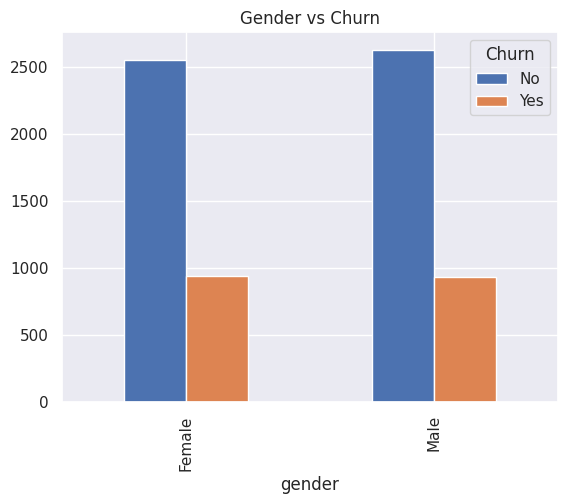

In [14]:
# Relation between Gender vs Churn
gender_wise = pd.crosstab(dataset['gender'], dataset['Churn'])
gender_wise.plot(kind='bar')
plt.title("Gender vs Churn")

#### Handling missing value

In [15]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [16]:
dataset[dataset['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

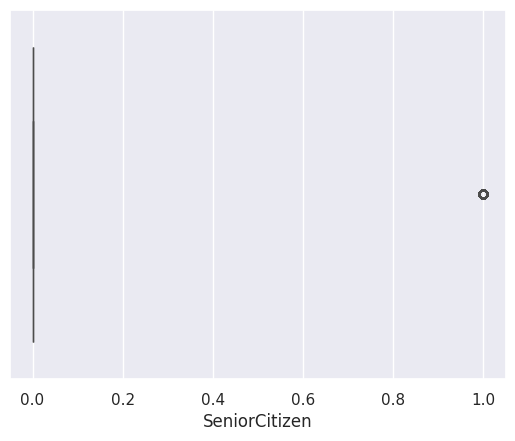

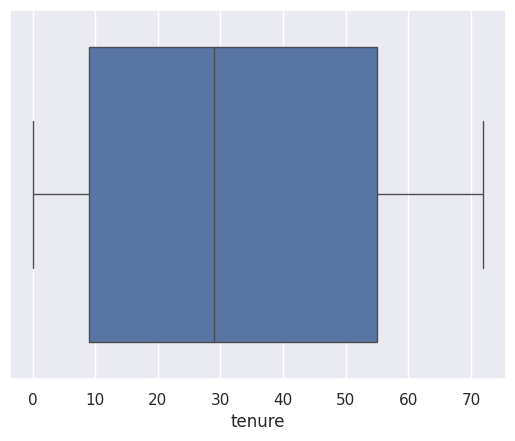

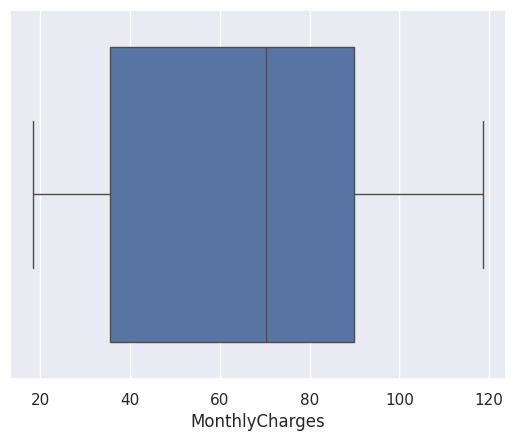

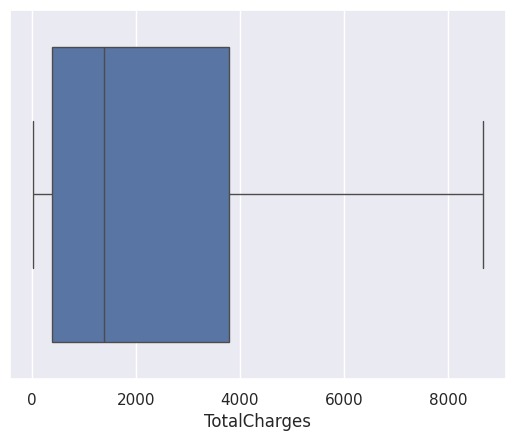

In [18]:
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset, x=i)
    plt.show()

# Handling Char/Object value

In [19]:
#Encoding categorical features

categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  dataset = pd.get_dummies(dataset, columns=[i],drop_first=True,dtype='int64')


In [20]:
dataset.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,No,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   object 
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

In [22]:
# mapping
dataset['Churn'] = np.where(dataset['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

In [23]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370,0.504756,0.483033,0.299588,0.903166,0.421837,0.439585,0.216669,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.270398,0.441561,0.500013,0.499748,0.458110,0.295752,0.493888,0.496372,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
condition = [((dataset.tenure >= 0)&(dataset.tenure <= 12)), ((dataset.tenure > 12)&(dataset.tenure <= 24)),
             ((dataset.tenure > 24)&(dataset.tenure <= 36)),((dataset.tenure > 36)&(dataset.tenure <= 48)),
             ((dataset.tenure > 48)&(dataset.tenure <= 60)), (dataset.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
dataset['tenure_range'] = np.select(condition, choice)

In [25]:
dataset.drop(columns=['tenure'],inplace=True)

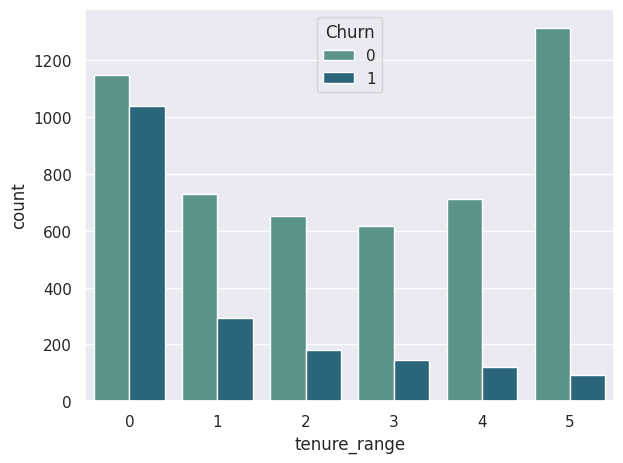

In [26]:
sns.countplot(x= 'tenure_range', hue='Churn', data=dataset, palette='crest', order=choice)
plt.tight_layout()

#### We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

## Stastical Test

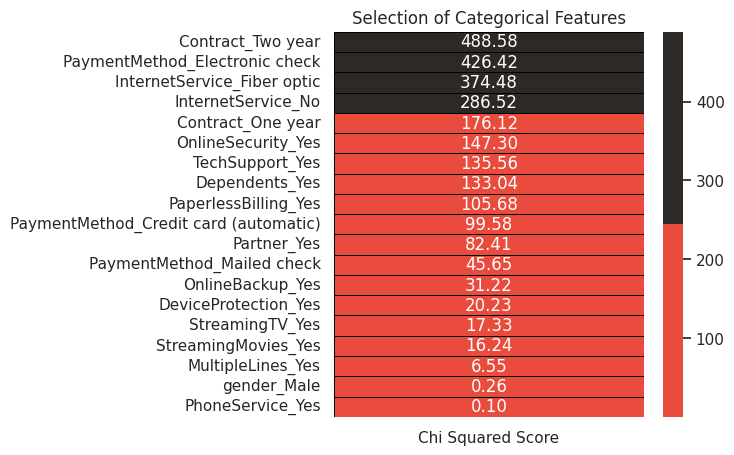

In [27]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_features = ['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_Fiber optic',
             'InternetService_No','OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
            'StreamingTV_Yes','StreamingMovies_Yes','Contract_One year','Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)'
            ,'PaymentMethod_Electronic check','PaymentMethod_Mailed check']
colors = ['#E94B3C', '#2D2926']
features = dataset.loc[:,categorical_features]
target = dataset['Churn']
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

Contract_Two year,PaymentMethod_Electronic, InternetService_Fiber optic check and InternetService_No feature gives more wieghtage to target feature

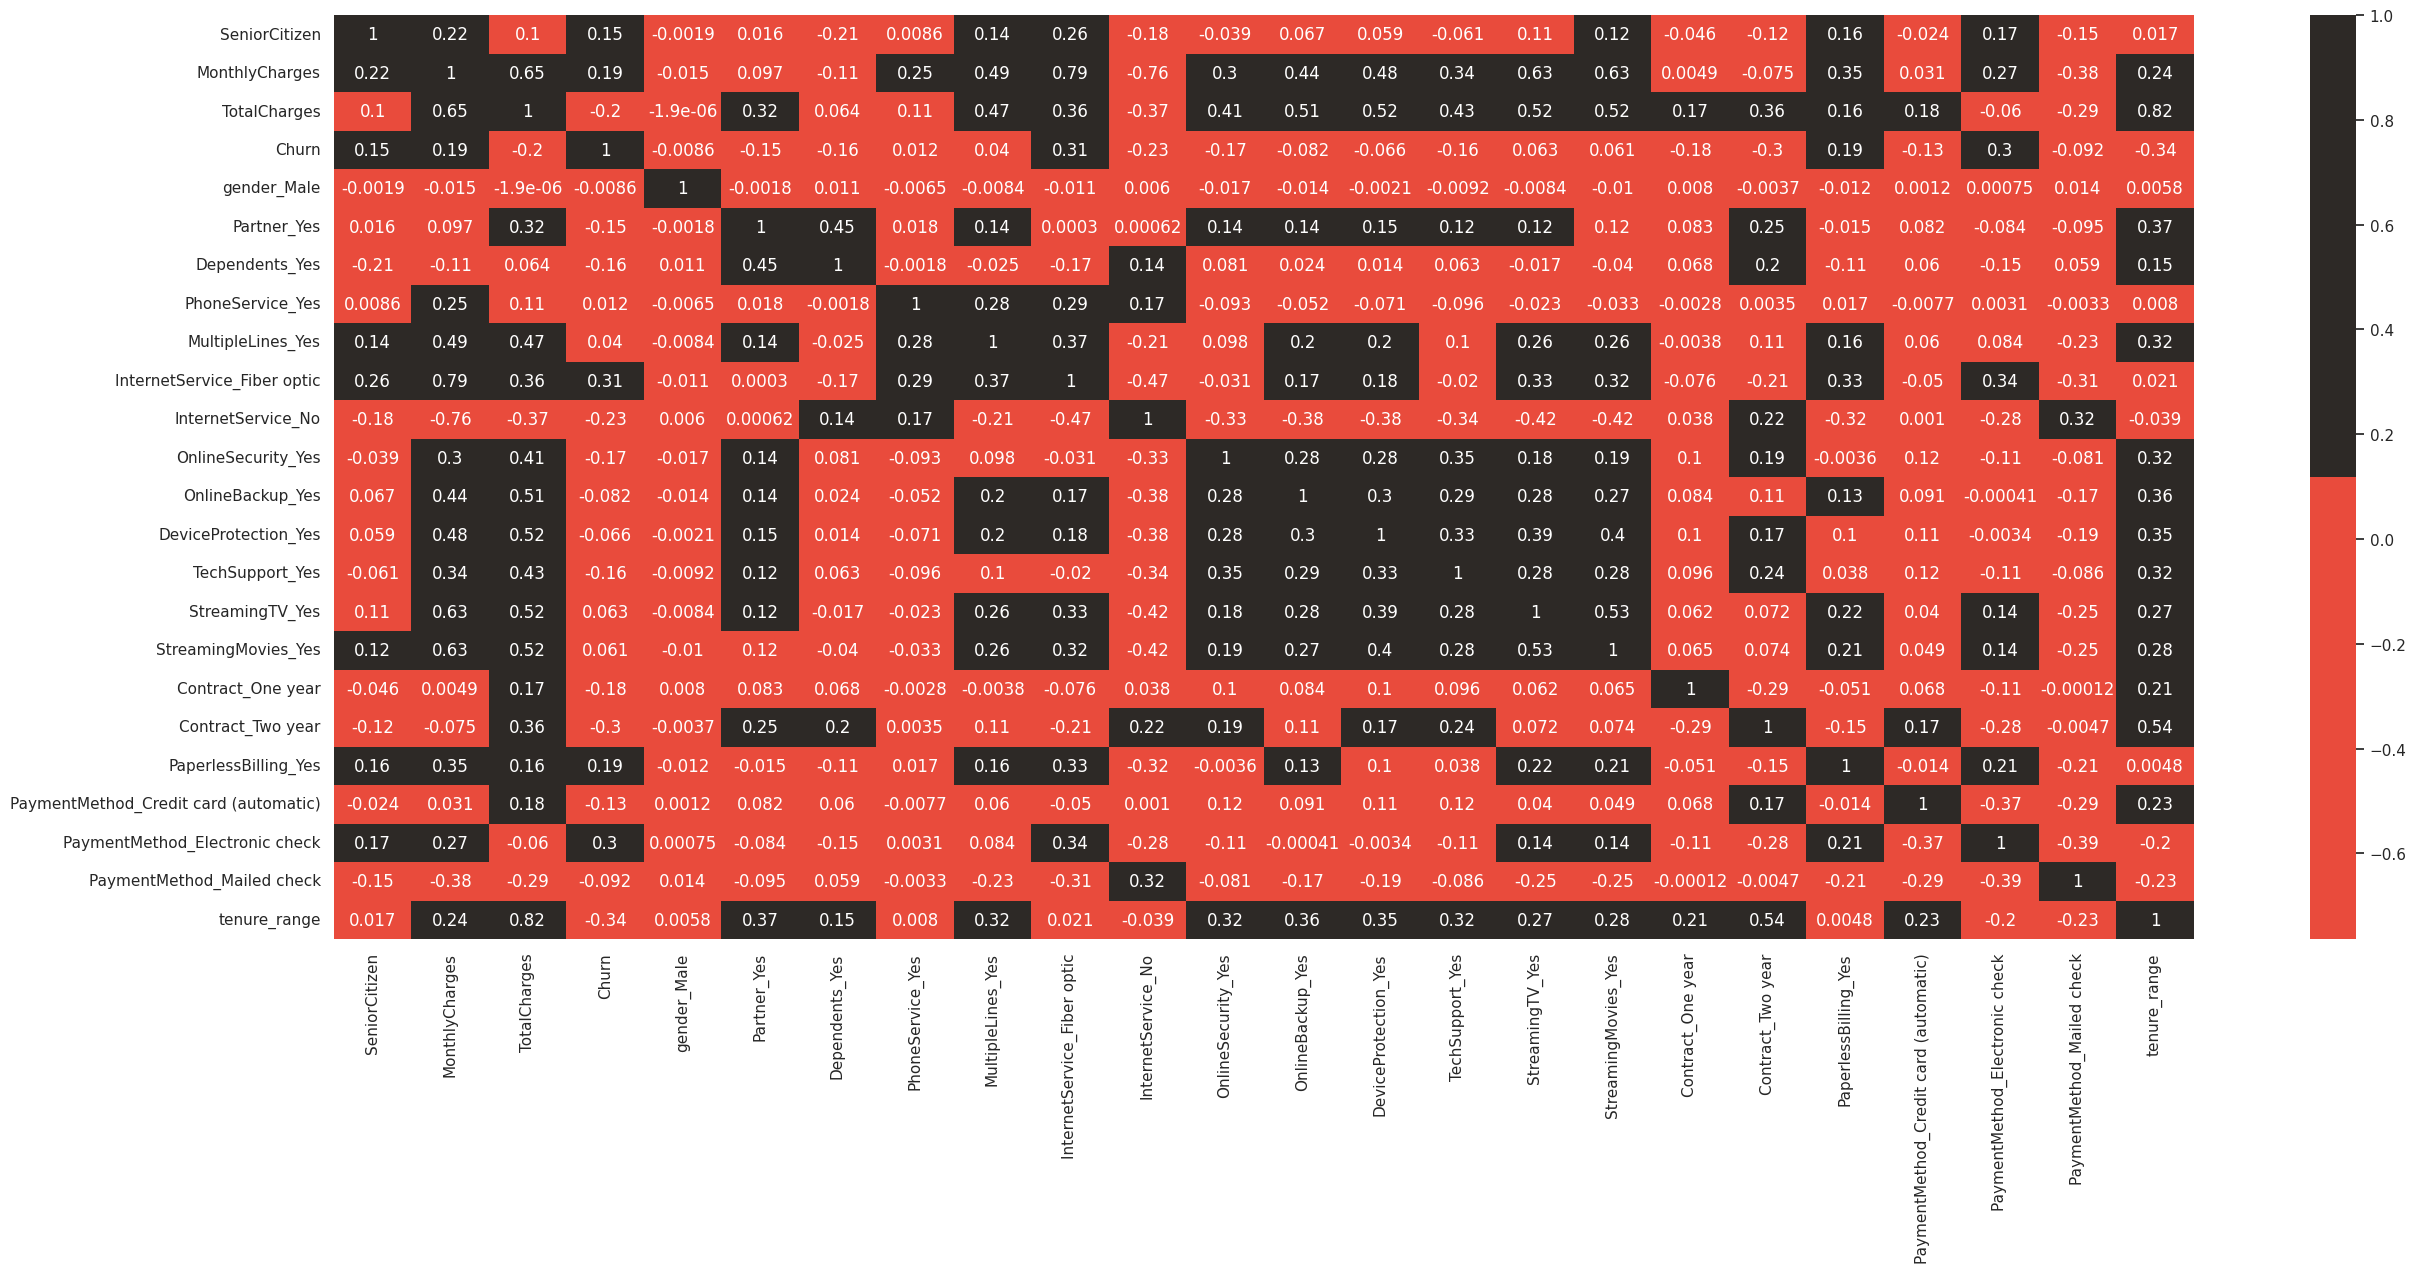

In [28]:
plt.figure(figsize=(30,12))
sns.heatmap(dataset.corr(), cmap=colors, annot=True);

In [29]:
# splitting the data into independent and dependent variable
x = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [30]:
# Feature Importance from RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x, y)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Random Forest")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Random Forest
TotalCharges: 0.2828
MonthlyCharges: 0.2074
InternetService_Fiber optic: 0.1003
tenure_range: 0.0940
PaymentMethod_Electronic check: 0.0290
gender_Male: 0.0250
PaperlessBilling_Yes: 0.0232
Partner_Yes: 0.0214
SeniorCitizen: 0.0201
Dependents_Yes: 0.0185
OnlineBackup_Yes: 0.0180
OnlineSecurity_Yes: 0.0167
TechSupport_Yes: 0.0164
MultipleLines_Yes: 0.0160
Contract_One year: 0.0159
Contract_Two year: 0.0159
DeviceProtection_Yes: 0.0152
StreamingMovies_Yes: 0.0131
PaymentMethod_Mailed check: 0.0124
PaymentMethod_Credit card (automatic): 0.0123
StreamingTV_Yes: 0.0111
InternetService_No: 0.0106
PhoneService_Yes: 0.0045


In [31]:
# Feature Importance from GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x, y)
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Gradient Boosting")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Gradient Boosting
tenure_range: 0.2327
InternetService_Fiber optic: 0.2022
TotalCharges: 0.1292
PaymentMethod_Electronic check: 0.1231
Contract_Two year: 0.0686
MonthlyCharges: 0.0614
Contract_One year: 0.0576
InternetService_No: 0.0375
PaperlessBilling_Yes: 0.0188
OnlineSecurity_Yes: 0.0154
TechSupport_Yes: 0.0121
StreamingMovies_Yes: 0.0095
SeniorCitizen: 0.0084
MultipleLines_Yes: 0.0056
StreamingTV_Yes: 0.0043
PhoneService_Yes: 0.0042
gender_Male: 0.0035
Dependents_Yes: 0.0035
Partner_Yes: 0.0008
OnlineBackup_Yes: 0.0007
PaymentMethod_Credit card (automatic): 0.0007
PaymentMethod_Mailed check: 0.0001
DeviceProtection_Yes: 0.0000


## Split train data and test data

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [33]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("Original-",y_train.value_counts())
print("After SMOTE-",y_smote.value_counts())

Original- Churn
0    4148
1    1486
Name: count, dtype: int64
After SMOTE- Churn
0    4148
1    4148
Name: count, dtype: int64


In [34]:
# data leakage problem -

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_smote)
x_test = sc.transform(x_test)

In [35]:
x_train=pd.DataFrame(x_train,columns=x_smote.columns)
x_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.400552,0.650055,1.996722,-0.868281,-0.780784,-0.518171,0.342939,1.285699,-1.025147,-0.436561,-0.502598,1.64526,1.621923,1.963237,1.343353,1.339129,-0.411229,2.235745,-1.211437,-0.418812,-0.72786,-0.468276,1.723339
1,-0.400552,1.676517,2.978475,-0.868281,1.280764,1.929864,0.342939,1.285699,0.975470,-0.436561,1.989662,1.64526,1.621923,1.963237,1.343353,1.339129,-0.411229,2.235745,0.825466,-0.418812,-0.72786,-0.468276,1.723339
2,-0.400552,0.226464,0.460390,1.151701,1.280764,1.929864,0.342939,1.285699,-1.025147,-0.436561,1.989662,1.64526,1.621923,-0.509363,1.343353,-0.746754,-0.411229,-0.447278,0.825466,2.387704,-0.72786,-0.468276,0.652015
3,-0.400552,-0.466047,-0.512773,1.151701,-0.780784,-0.518171,-2.915967,-0.777787,-1.025147,-0.436561,1.989662,1.64526,1.621923,1.963237,1.343353,-0.746754,-0.411229,2.235745,-1.211437,-0.418812,-0.72786,2.135491,-0.419309
4,-0.400552,-0.444955,0.994051,1.151701,1.280764,1.929864,-2.915967,-0.777787,-1.025147,-0.436561,1.989662,1.64526,1.621923,1.963237,-0.744406,1.339129,-0.411229,2.235745,0.825466,2.387704,-0.72786,-0.468276,1.723339


In [36]:
x_test=pd.DataFrame(x_test,columns=x_smote.columns)
x_test.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.400552,1.136922,2.370398,-0.868281,1.280764,1.929864,0.342939,1.285699,0.975470,-0.436561,1.989662,-0.607807,1.621923,1.963237,-0.744406,1.339129,-0.411229,2.235745,-1.211437,-0.418812,1.37389,-0.468276,1.723339
1,-0.400552,-0.787695,-0.914733,1.151701,-0.780784,-0.518171,0.342939,-0.777787,-1.025147,-0.436561,-0.502598,-0.607807,-0.616552,-0.509363,-0.744406,-0.746754,-0.411229,-0.447278,0.825466,-0.418812,-0.72786,2.135491,-0.954971
2,-0.400552,-1.706941,-0.926808,1.151701,-0.780784,-0.518171,0.342939,-0.777787,-1.025147,2.290630,-0.502598,-0.607807,-0.616552,-0.509363,-0.744406,-0.746754,-0.411229,-0.447278,-1.211437,-0.418812,-0.72786,2.135491,-0.954971
3,2.496554,-0.631265,-0.882685,-0.868281,1.280764,-0.518171,0.342939,-0.777787,-1.025147,-0.436561,-0.502598,1.645260,-0.616552,-0.509363,-0.744406,-0.746754,-0.411229,-0.447278,-1.211437,2.387704,-0.72786,-0.468276,-0.954971
4,2.496554,0.194826,-0.901826,1.151701,-0.780784,-0.518171,0.342939,1.285699,0.975470,-0.436561,-0.502598,-0.607807,-0.616552,-0.509363,-0.744406,-0.746754,-0.411229,-0.447278,0.825466,-0.418812,1.37389,-0.468276,-0.954971


In [37]:
x_test.shape

(1409, 23)

# Model Selection

## Model 1 : AdaBoost

***************************
[[3233  915]
 [ 466 3682]]

[[810 216]
 [128 255]]
***************************
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4148
           1       0.80      0.89      0.84      4148

    accuracy                           0.83      8296
   macro avg       0.84      0.83      0.83      8296
weighted avg       0.84      0.83      0.83      8296


              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1026
           1       0.54      0.67      0.60       383

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.76      1409

***************************
Accuracy Train Score- 0.8335342333654774

Accuracy Test Score- 0.7558552164655784


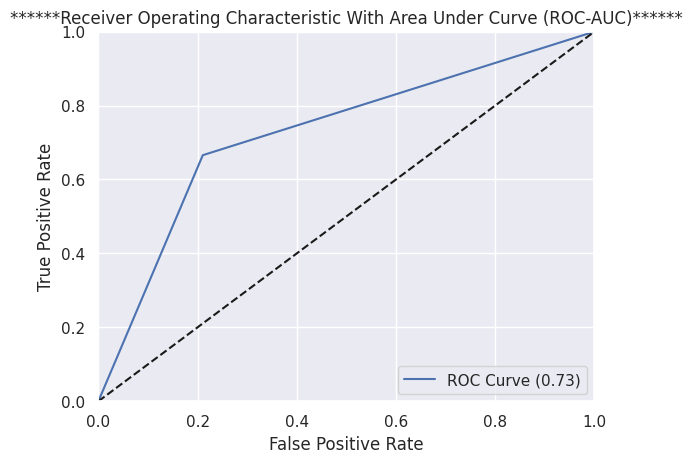

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ada = AdaBoostClassifier()
ada.fit(x_train, y_smote)
y_pred_train_ada = ada.predict(x_train)
y_pred_test_ada = ada.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_ada))
print()
print(confusion_matrix(y_test, y_pred_test_ada))
print("***************************")
print(classification_report(y_smote, y_pred_train_ada))
print()
print(classification_report(y_test, y_pred_test_ada))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_ada))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_ada))

ada_roc_auc = roc_auc_score(y_test, y_pred_test_ada)
ada_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ada)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % ada_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 2 - Gradient Boosting Algorithm

***************************
[[3407  741]
 [ 493 3655]]

[[847 179]
 [141 242]]
***************************
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4148
           1       0.83      0.88      0.86      4148

    accuracy                           0.85      8296
   macro avg       0.85      0.85      0.85      8296
weighted avg       0.85      0.85      0.85      8296


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1026
           1       0.57      0.63      0.60       383

    accuracy                           0.77      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409

***************************
Accuracy Train Score- 0.8512536162005786

Accuracy Test Score- 0.772888573456352


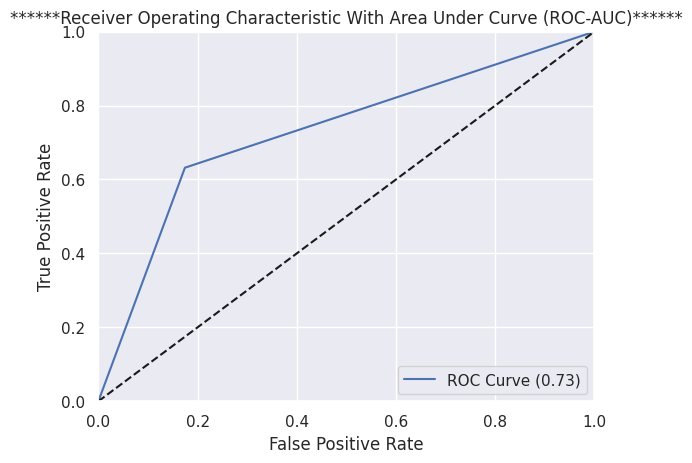

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier()
gdm.fit(x_train, y_smote)
y_pred_train_gdm = gdm.predict(x_train)
y_pred_test_gdm = gdm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_gdm))
print()
print(confusion_matrix(y_test, y_pred_test_gdm))
print("***************************")
print(classification_report(y_smote, y_pred_train_gdm))
print()
print(classification_report(y_test, y_pred_test_gdm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_gdm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_gdm))

gdm_roc_auc = roc_auc_score(y_test, y_pred_test_gdm)
gdm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_gdm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % gdm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 3 - XGBoost Classification

***************************
[[3926  222]
 [ 151 3997]]

[[864 162]
 [186 197]]
***************************
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4148
           1       0.95      0.96      0.96      4148

    accuracy                           0.96      8296
   macro avg       0.96      0.96      0.96      8296
weighted avg       0.96      0.96      0.96      8296


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1026
           1       0.55      0.51      0.53       383

    accuracy                           0.75      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.75      0.75      0.75      1409

***************************
Accuracy Train Score- 0.9550385728061717

Accuracy Test Score- 0.7530163236337828


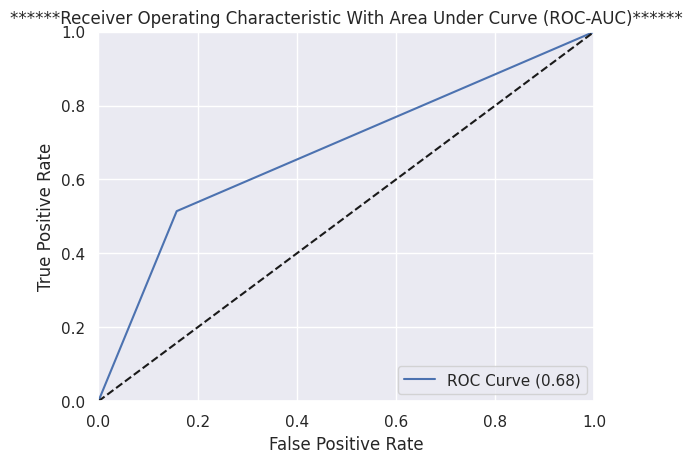

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_smote)
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))
print("***************************")
print(classification_report(y_smote, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_xgb))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_xgb))

xgb_roc_auc = roc_auc_score(y_test, y_pred_test_xgb)
xgb_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % xgb_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 4 - Bagging Classifier

***************************
[[4122   26]
 [  91 4057]]

[[869 157]
 [198 185]]
***************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4148
           1       0.99      0.98      0.99      4148

    accuracy                           0.99      8296
   macro avg       0.99      0.99      0.99      8296
weighted avg       0.99      0.99      0.99      8296


              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1026
           1       0.54      0.48      0.51       383

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.74      0.75      0.74      1409

***************************
Accuracy Train Score- 0.9858968177434908

Accuracy Test Score- 0.7480482611781405


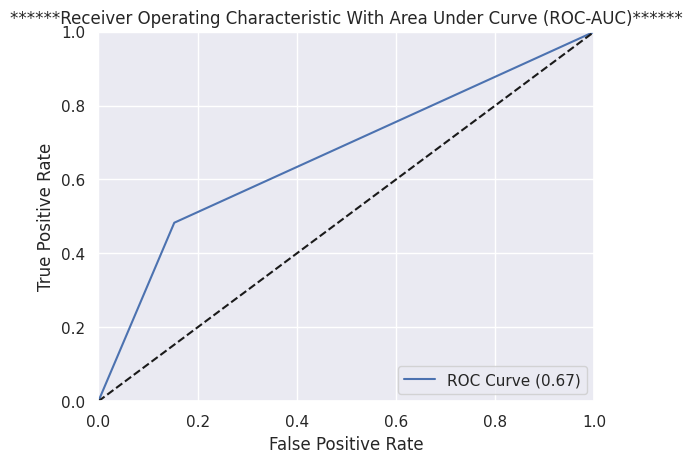

In [41]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_smote)
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_bagging))
print()
print(confusion_matrix(y_test, y_pred_test_bagging))
print("***************************")
print(classification_report(y_smote, y_pred_train_bagging))
print()
print(classification_report(y_test, y_pred_test_bagging))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_bagging))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_bagging))

bagging_roc_auc = roc_auc_score(y_test, y_pred_test_bagging)
bagging_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_bagging)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % bagging_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 5 - RandomForest Classification

***************************
[[4142    6]
 [   4 4144]]

[[866 160]
 [183 200]]
***************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4148
           1       1.00      1.00      1.00      4148

    accuracy                           1.00      8296
   macro avg       1.00      1.00      1.00      8296
weighted avg       1.00      1.00      1.00      8296


              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1026
           1       0.56      0.52      0.54       383

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.75      0.76      0.75      1409

***************************
Accuracy Train Score- 0.9987945998071359

Accuracy Test Score- 0.7565649396735273


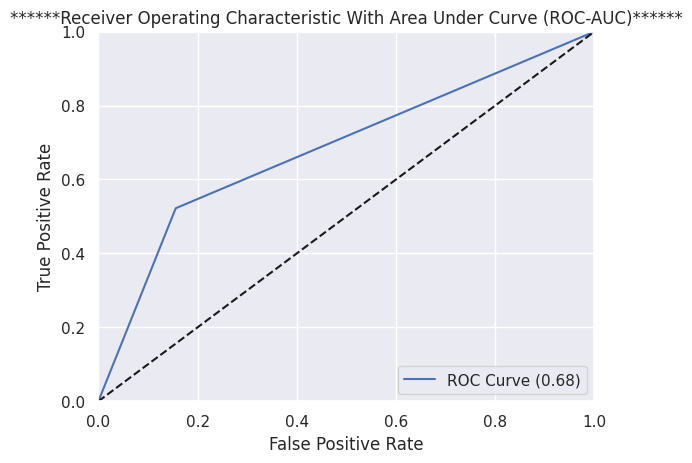

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train, y_smote)
y_pred_train_rfm = rfm.predict(x_train)
y_pred_test_rfm = rfm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_rfm))
print()
print(confusion_matrix(y_test, y_pred_test_rfm))
print("***************************")
print(classification_report(y_smote, y_pred_train_rfm))
print()
print(classification_report(y_test, y_pred_test_rfm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_rfm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_rfm))

rfm_roc_auc = roc_auc_score(y_test, y_pred_test_rfm)
rfm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rfm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % rfm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## Model 6 - LogisticRegression

***************************
[[3391  757]
 [ 631 3517]]

[[852 174]
 [151 232]]
***************************
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4148
           1       0.82      0.85      0.84      4148

    accuracy                           0.83      8296
   macro avg       0.83      0.83      0.83      8296
weighted avg       0.83      0.83      0.83      8296


              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1026
           1       0.57      0.61      0.59       383

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.77      0.77      0.77      1409

***************************
Accuracy Train Score- 0.8326904532304725

Accuracy Test Score- 0.7693399574166075


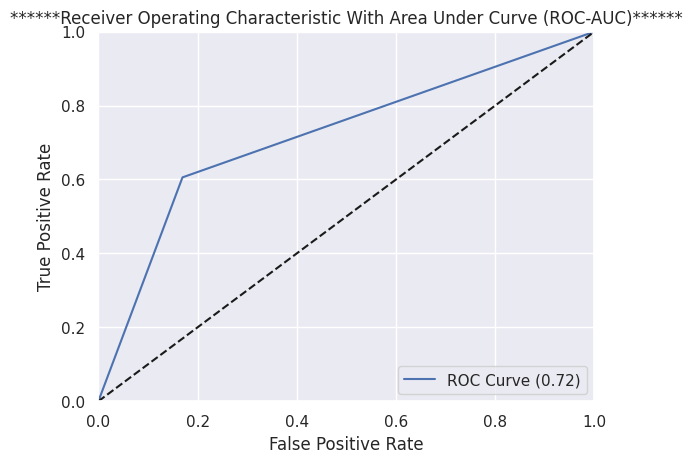

In [43]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(x_train, y_smote)
y_pred_train_lrm = lrm.predict(x_train)
y_pred_test_lrm = lrm.predict(x_test)
print("***************************")
print(confusion_matrix(y_smote, y_pred_train_lrm))
print()
print(confusion_matrix(y_test, y_pred_test_lrm))
print("***************************")
print(classification_report(y_smote, y_pred_train_lrm))
print()
print(classification_report(y_test, y_pred_test_lrm))
print("***************************")
print("Accuracy Train Score-",accuracy_score(y_smote, y_pred_train_lrm))
print()
print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test_lrm))

lrm_roc_auc = roc_auc_score(y_test, y_pred_test_lrm)
lrm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lrm)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % lrm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

## 7- MLP model

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6994 - loss: 0.6054 - val_accuracy: 0.7644 - val_loss: 0.4816
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4556 - val_accuracy: 0.7544 - val_loss: 0.4746
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.4249 - val_accuracy: 0.7459 - val_loss: 0.4792
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8062 - loss: 0.4177 - val_accuracy: 0.7537 - val_loss: 0.4828
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8220 - loss: 0.4013 - val_accuracy: 0.7530 - val_loss: 0.4806
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8223 - loss: 0.3928 - val_accuracy: 0.7580 - val_loss: 0.4829
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8284 - loss: 0.3750 - val_accuracy: 0.7587 - val_loss: 0.4774
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8323 - loss: 0.3786 - val_accuracy: 0.7573 - val_loss:

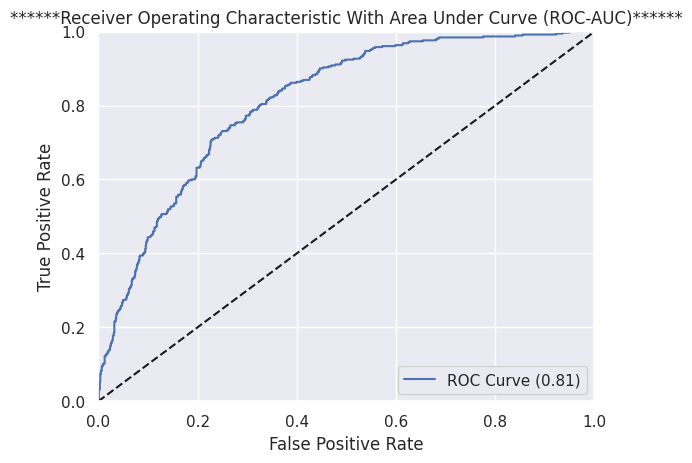

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Fully Connected Layer
# 1st Hidden Layer
model.add(Dense(64, input_dim = 23, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# 2nd Hidden Layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

x_train, y_smote
# Fit the model
model.fit(x_train, y_smote, epochs=10, batch_size= 128, validation_data=(x_test, y_test))


y_pred_test = model.predict(x_test)

print("***************************")

print("Accuracy Test Score-",accuracy_score(y_test, y_pred_test.round()))

lrm_roc_auc = roc_auc_score(y_test, y_pred_test)
lrm_roc_auc


fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % lrm_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()

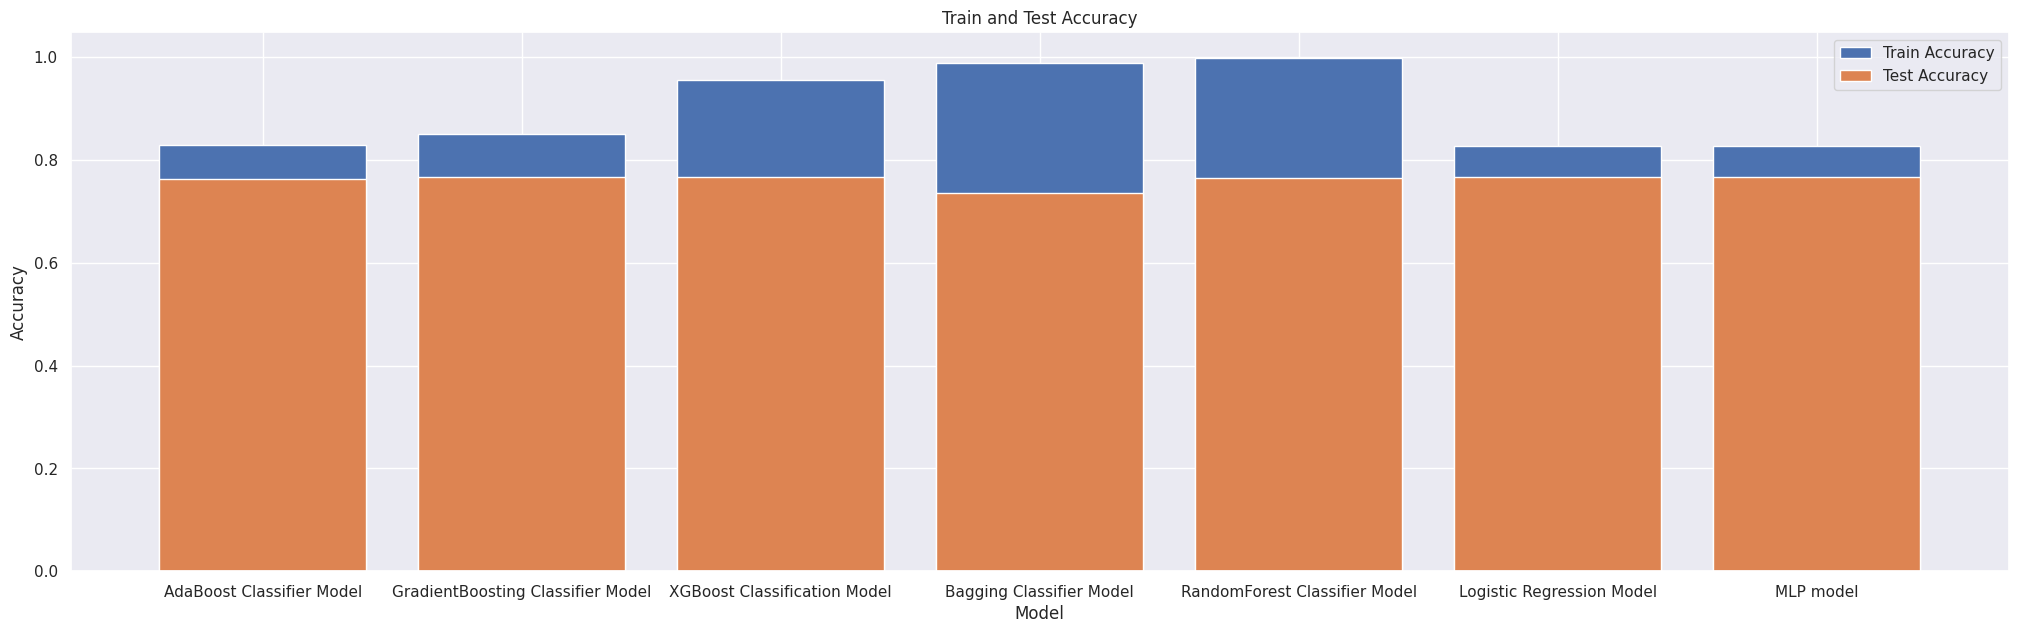

In [45]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model','MLP model']
train_accuracy = [0.8291947926711668, 0.8498071359691417, 0.9557618129218901, 0.9881870781099324,  0.9986740597878495,0.8278688524590164,0.8280]
test_accuracy = [0.7629524485450674, 0.7679205110007097, 0.7665010645848119, 0.7366926898509581, 0.7643718949609652, 0.7665010645848119,0.7679205110007097]


# Create a bar chart
plt.figure(figsize=(25, 7))
plt.bar(model_names, train_accuracy, label='Train Accuracy')
plt.bar(model_names, test_accuracy, label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

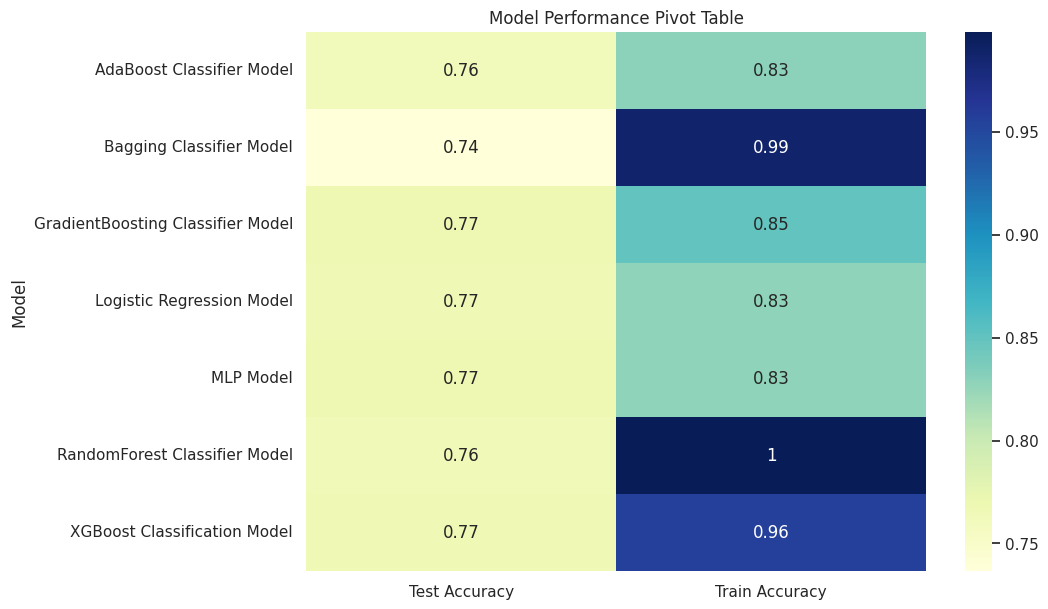

In [46]:
model_names = ['AdaBoost Classifier Model','GradientBoosting Classifier Model','XGBoost Classification Model', 'Bagging Classifier Model', 'RandomForest Classifier Model', 'Logistic Regression Model','MLP Model']
train_accuracy = [0.8291947926711668, 0.8498071359691417, 0.9557618129218901, 0.9881870781099324,  0.9986740597878495,0.8278688524590164,0.8280]
test_accuracy = [0.7629524485450674, 0.7679205110007097, 0.7665010645848119, 0.7366926898509581, 0.7643718949609652, 0.7665010645848119,0.7679205110007097]

df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

pivot_table = pd.pivot_table(df, values=['Train Accuracy', 'Test Accuracy'], index='Model', aggfunc=np.mean)

# create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Model Performance Pivot Table")
plt.show()

Based on the model performance pivot table,

*GradientBoosting Classifier Model*

Reason:

- Balanced performance: Test accuracy (0.77) and Train accuracy (0.85) are relatively close, indicating less overfitting.
- High test accuracy: 0.77 is among the highest test accuracies in the table.

Other models have issues:

- AdaBoost Classifier: Lower test accuracy (0.76) compared to GradientBoosting.
- Bagging Classifier: Severe overfitting (Test accuracy: 0.74, Train accuracy: 0.99).
- Logistic Regression and MLP: Similar performance to GradientBoosting, but slightly lower test accuracy.
- RandomForest Classifier: Perfect train accuracy (1) indicates overfitting.
- XGBoost Classification: High train accuracy (0.96), but relatively lower test accuracy (0.77).

GradientBoosting Classifier Model offers a good balance between test and train accuracy, making it a reliable choice.

**Perform hyperparameter tuning and cross-validation to ensure that the model is not overfitting or underfitting.**

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

model = GradientBoostingClassifier()
param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [100,200],
              'learning_rate': [0.01,0.1, 0.5],
              'max_features':['auto','sqrt','log2']

             }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation

grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(x_train, y_smote)

# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Refit the model with the best hyperparameters and evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_smote, y_pred))

KeyboardInterrupt: 

In [47]:
import pickle
with open('gb_model.pkl1', 'wb') as f:
  pickle.dump(gdm,f)


In [48]:
#!pip install flask

In [49]:
#!pip install flask-ngrok

In [50]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(5000)"))

https://nv4pvrh7jyf-496ff2e9c6d22116-5000-colab.googleusercontent.com/


In [62]:
!ngrok http 5000

/bin/bash: line 1: ngrok: command not found


In [65]:
from flask import Flask, request, jsonify,render_template
from flask_ngrok import run_with_ngrok
import requests
app=Flask(__name__)
run_with_ngrok(app)

with open('gb_model.pkl1', 'rb') as f:
  model=pickle.load(f)

@app.route('/')
def home():
  return "Hello World"




url='https://nv4pvrh7jyf-496ff2e9c6d22116-5000-colab.googleusercontent.com/predict'

data={'SeniorCitizen':1,'MonthlyCharges':23,'TotalCharges':230,'gender_Male':1,'Partner_Yes	':0,'Dependents_Yes':1
      ,'PhoneService_Yes':1,'MultipleLines_Yes':0,'InternetService_Fiber optic':1,'InternetService_No':0,'OnlineSecurity_Yes':1
      ,'OnlineBackup_Yes':1,'DeviceProtection_Yes':1,'TechSupport_Yes':1,'StreamingTV_Yes':0,'StreamingMovies_Yes':0,'Contract_One year':1,
      'Contract_Two year':0,'PaperlessBilling_Yes':1,'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':1,'PaymentMethod_Mailed check':0,'tenure_range':0}


response = requests.post(url,json=data)


@app.route('/predict',methods=['POST'])
def predict():
  data=request.get_json()
  df=pd.DataFrame(data,index=[0])
  prediction=model.predict(df)
  return jsonify({'prediction':prediction[0]})


In [66]:

if __name__ == "__main__":
    app.run()



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-46:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [61]:
url='https://nv4pvrh7jyf-496ff2e9c6d22116-5000-colab.googleusercontent.com/predict'

data={'SeniorCitizen':1,'MonthlyCharges':23,'TotalCharges':230,'gender_Male':1,'Partner_Yes	':0,'Dependents_Yes':1
      ,'PhoneService_Yes':1,'MultipleLines_Yes':0,'InternetService_Fiber optic':1,'InternetService_No':0,'OnlineSecurity_Yes':1
      ,'OnlineBackup_Yes':1,'DeviceProtection_Yes':1,'TechSupport_Yes':1,'StreamingTV_Yes':0,'StreamingMovies_Yes':0,'Contract_One year':1,
      'Contract_Two year':0,'PaperlessBilling_Yes':1,'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':1,'PaymentMethod_Mailed check':0,'tenure_range':0}


response = requests.post(url,json=data)

print(response)

<Response [405]>


In [ ]:
from pyngrok import ngrok
from flask import Flask

app = Flask(__name__)
'''
@app.route("/")
def root():
  return "Hello world!"'''

@app.route('/predict',methods=['POST'])
def predict():
  data=request.get_json()
  df=pd.DataFrame(data,index=[0])
  prediction=model.predict(df)
  return "Hello world!"

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:55:44] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:55:46] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:55:53] "GET /predict HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:55:54] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:56:18] "GET /predict HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:56:19] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:58:28] "GET /?authuser=0 HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:58:29] "GET /favicon.ico?authuser=0 HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [08/Nov/2024 16:58:37] "GET /predict?authuser=0 HTTP/1.1" 405 -
INFO:werkzeug:127.0.0.1 - - [08/

In [ ]:
data={'SeniorCitizen':1,'MonthlyCharges':23,'TotalCharges':230,'gender_Male':1,'Partner_Yes	':0,'Dependents_Yes':1
      ,'PhoneService_Yes':1,'MultipleLines_Yes':0,'InternetService_Fiber optic':1,'InternetService_No':0,'OnlineSecurity_Yes':1
      ,'OnlineBackup_Yes':1,'DeviceProtection_Yes':1,'TechSupport_Yes':1,'StreamingTV_Yes':0,'StreamingMovies_Yes':0,'Contract_One year':1,
      'Contract_Two year':0,'PaperlessBilling_Yes':1,'PaymentMethod_Credit card (automatic)':0,'PaymentMethod_Electronic check':1,'PaymentMethod_Mailed check':0,'tenure_range':0}

IndentationError: unexpected indent (<ipython-input-1-937331025903>, line 12)

IndentationError: unexpected indent (<ipython-input-2-937331025903>, line 12)